In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval
import json

df= pd.read_csv('GOLDEN_Tot_ZeroBias_UL2017_DataFrame_chargeInner_PXLayer_1.csv')

df['histo']=df['histo'].apply(literal_eval)

df.set_index(['fromrun','fromlumi'], inplace=True, drop=False)
df.sort_index(inplace=True)
#print(df.columns)
#
df['labels']=0

print(df.tail())


                  fromrun  fromlumi  fromrun.1  fromlumi.1  entries  \
fromrun fromlumi                                                      
306460  60         306460        60     306460          60    10164   
        61         306460        61     306460          61    10358   
        62         306460        62     306460          62    10107   
        63         306460        63     306460          63    10151   
        64         306460        64     306460          64      327   

                                                              histo  labels  
fromrun fromlumi                                                             
306460  60        [11, 51, 59, 78, 122, 138, 181, 248, 266, 324,...       0  
        61        [6, 40, 58, 114, 105, 162, 183, 233, 293, 336,...       0  
        62        [11, 43, 74, 88, 99, 143, 204, 220, 254, 357, ...       0  
        63        [6, 47, 62, 90, 116, 130, 168, 263, 288, 338, ...       0  
        64        [0, 2, 1, 3, 5, 

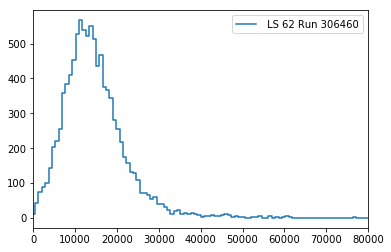

In [2]:
def PlotHist(run,ls):

    Xmax=80000.0
    Xmin=0.0
    Xbins=100
    hname="chargeInner_PXLayer_1"
    
    global df
    
    ahisto=df['histo'][run][ls]
    
    x= np.linspace(Xmin,Xmax,Xbins)
    plt.xlim(Xmin,Xmax)
    
    plt.step(x, ahisto, where='mid', label=(" LS " + str(df.fromlumi[run][ls]) + " Run " + str(df.fromrun[run][ls]) ))
    plt.legend()
    
PlotHist(306460,62)

In [51]:
import keras
from sklearn.preprocessing import normalize
from sklearn.decomposition import NMF

data=np.array(df['histo'])
data = np.stack(data, axis=0)

data=normalize(data, norm='l1', axis=1)

model= NMF(n_components=5, verbose=True)

H=model.fit_transform(data)
W=model.components_



violation: 1.0
violation: 0.822431458488
violation: 0.592862602501
violation: 0.316851231159
violation: 0.213760284
violation: 0.162333747654
violation: 0.128235826092
violation: 0.105454284841
violation: 0.0882634199525
violation: 0.0747665794454
violation: 0.064624801991
violation: 0.057097486717
violation: 0.050890524078
violation: 0.045803574247
violation: 0.0415672296624
violation: 0.0379719110152
violation: 0.0350013220677
violation: 0.0325241741969
violation: 0.0303330902651
violation: 0.0283860178703
violation: 0.0266453693398
violation: 0.0250754802667
violation: 0.0236541035757
violation: 0.0223701242812
violation: 0.0212097856
violation: 0.020191175771
violation: 0.0192947857204
violation: 0.0184668026318
violation: 0.0177041253758
violation: 0.0170229903215
violation: 0.0164042024487
violation: 0.01583287793
violation: 0.0153031038555
violation: 0.0148117708446
violation: 0.014352509627
violation: 0.0139240380926
violation: 0.0135354073045
violation: 0.0131904288727
violati

In [58]:
print(len(W))
print(W[0].sum())

5
32.37455293624052


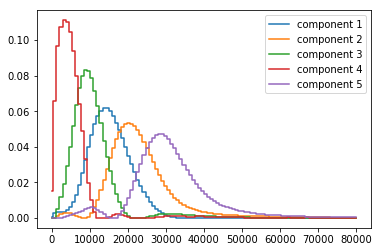

In [62]:
def plotComponents(comp):
    size=len(W)
    x= np.linspace(0,80000,100)
    for i in range(0,size):
        plt.step(x,comp[i]/comp[i].sum(), where='mid', label="component " + str(i+1))
    plt.legend()
    plt.show()    

plotComponents(W)

In [80]:
import math

from keras import backend as K
import tensorflow as tf

def mseTop10(y_true, y_pred):
    top_values, _ = tf.nn.top_k(K.square(y_pred - y_true), k=10, sorted=True)
    mean=K.mean(top_values, axis=-1)
    return K.sqrt(mean)

#def plotDecomposition()
x= np.linspace(0,80000,100)
plt.step(x,data[0], where='mid', label="original")
plt.step(x,W[0]*H[0][0], where='mid', label="component 1")
plt.step(x,W[1]*H[0][1], where='mid', label="component 2")
plt.step(x,W[2]*H[0][2], where='mid', label="component 3")
plt.step(x,W[3]*H[0][3], where='mid', label="component 4")
plt.step(x,W[4]*H[0][4], where='mid', label="component 5")
tot=W[0]*H[0][0]+W[1]*H[0][1]+W[2]*H[0][2]+W[3]*H[0][3]+W[4]*H[0][4]
err=K.eval(mseTop10(tot,data[0]))
plt.step(x,tot, where='mid', label="Reco, mse10="+str(err), linestyle='--',c="black")
#plt.text(0.5,0.5,str(err))
#plt.yscale("log")
plt.legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-80-71a434839c38>, line 21)

5
0.05619766981511917


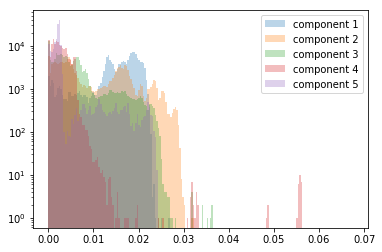

In [86]:
#extract coefficients for each component
rows=H.shape[0]
cols=H.shape[1]
print(cols)

print(H.max())
for i in range(0,cols):
    plt.hist(H[:,i],bins=200,range=(0,H.max()*1.2), alpha=0.3, label="component " + str(i+1))

plt.yscale("log")
plt.legend()
plt.show()

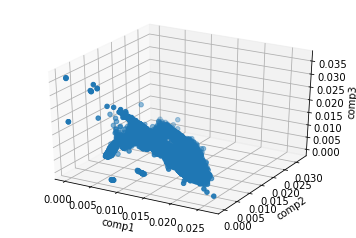

In [95]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(H[:,0],H[:,1],H[:,2])
ax.set_xlabel('comp1')
ax.set_ylabel('comp2')
ax.set_zlabel('comp3')
plt.show()